# App_Store Analytics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [40]:
df= pd.read_csv(r'C:\Users\aaparajit\Desktop\Nerdville Horror\Py_AppleStore_Kaggle_EDA_RF\AppleStore.csv',index_col='id')

In [41]:
df.head(3)

,Unnamed: 0,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
id,,,,,,,,,,,,,,,,
281656475,1,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
281796108,2,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
281940292,3,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1


In [42]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [43]:
df.head(3)

,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
id,,,,,,,,,,,,,,,
281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1


 EDA- Checking out most popular apps by genre and number of ratings

In [44]:
# defining a function to convert ytes to mb
def bittomb(b):
    mb=b/(1024.0*1024)
    return mb

In [45]:
df['size_in_mb']=df['size_bytes'].apply(bittomb)

In [46]:
df.drop(columns='size_bytes',inplace=True)

In [47]:
df['prime_genre'].unique()

array(['Games', 'Productivity', 'Weather', 'Shopping', 'Reference',
       'Finance', 'Music', 'Utilities', 'Travel', 'Social Networking',
       'Sports', 'Business', 'Health & Fitness', 'Entertainment',
       'Photo & Video', 'Navigation', 'Education', 'Lifestyle',
       'Food & Drink', 'News', 'Book', 'Medical', 'Catalogs'],
      dtype=object)

In [48]:
# Top rated apps by genre by user ratings
for i in df['prime_genre'].unique():
    newVar = df[df['prime_genre']==i]
    newVar.sort_values(by='user_rating',inplace=True)
    print("Top 5 for {} genre are".format(i))
    print(newVar['track_name'][::-1][:6])
    print("\n")

C:\Users\aaparajit\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Top 5 for Games genre are
id
1188375727    Escape the Sweet Shop Series
941057494                 Love You To Bits
1125318904                      Dice Crush
1125469780                     Rogue Ninja
1125806960            Escape the Cake Café
527358348                   Fieldrunners 2
Name: track_name, dtype: object


Top 5 for Productivity genre are
id
582793399     Rocket Video for Google Cast and Chromecast to TV
1086617993    BlockyTime - Track your time no need to Start/...
435693872             Kurumaki Calendar -month scroll calendar-
983826477               Productive habits & daily goals tracker
866450515                      Forest: Stay focused, be present
1025707485       VPN Proxy Master - Unlimited WiFi security VPN
Name: track_name, dtype: object


Top 5 for Weather genre are
id
458225159    NOAA Hi-Def Radar Pro -  Storm Warnings, Hurri...
482361332               Deluxe Moon Pro - Moon Phases Calendar
327193945                                    Hurricane Tracker
43420

In [11]:
# top rated apps by genre by ratings count
for i in df['prime_genre'].unique():
    var = df[(df['prime_genre']==i) & (df['rating_count_tot']>50000)]
    var.sort_values(by=['user_rating','rating_count_tot'],inplace=True)
    print("Top 5 for {} genre are".format(i))
    print(var['track_name'][::-1][:6])
    print("\n")

C:\Users\aaparajit\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Top 5 for Games genre are
id
487119327                                   Head Soccer
350642635                            Plants vs. Zombies
930574573    Sniper 3D Assassin: Shoot to Kill Gun Game
698255242                            Geometry Dash Lite
387428400                                Infinity Blade
625334537                                 Geometry Dash
Name: track_name, dtype: object


Top 5 for Productivity genre are
id
842842640                                          Google Docs
507874739                   Google Drive - free online storage
281796108                            Evernote - stay organized
422689480    Gmail - email by Google: secure, fast & organized
577586159                    Yahoo Mail - Keeps You Organized!
288113403        iTranslate - Language Translator & Dictionary
Name: track_name, dtype: object


Top 5 for Weather genre are
id
322439990                  MyRadar NOAA Weather Radar Forecast
628677149                                        Yahoo Weat

In [12]:
# Top free apps by ratings count >20000
for i in df['prime_genre'].unique():
    var_free = df[(df['prime_genre']==i) & (df['rating_count_tot']>20000) & (df['price']==0.00)]
    var_free.sort_values(by=['user_rating','rating_count_tot'],inplace=True)
    print("Top 5 for {} genre are".format(i))
    print(var_free['track_name'][::-1][:6])
    print("\n")

C:\Users\aaparajit\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Top 5 for Games genre are
id
487119327                                          Head Soccer
930574573           Sniper 3D Assassin: Shoot to Kill Gun Game
698255242                                   Geometry Dash Lite
887947640                                         CSR Racing 2
600674056    Pictoword: Fun 2 Pics Guess What's the Word Tr...
606190854                                           Iron Force
Name: track_name, dtype: object


Top 5 for Productivity genre are
id
842842640                                          Google Docs
507874739                   Google Drive - free online storage
586447913                                       Microsoft Word
410395246                                    Microsoft OneNote
443369807        Hotspot Shield Free VPN Proxy & Wi-Fi Privacy
364901807    Documents 6 - File manager, PDF reader and bro...
Name: track_name, dtype: object


Top 5 for Weather genre are
id
322439990                  MyRadar NOAA Weather Radar Forecast
628677149        

Top 5 for Catalogs genre are
Series([], Name: track_name, dtype: object)




In [13]:
for i in df['prime_genre'].unique():
    var_free = df[(df['prime_genre']==i) & (df['rating_count_tot']>20000) & (df['price']==0.00)]
    var_free.sort_values(by=['user_rating','rating_count_tot'],inplace=True)
    print("Top 5 for {} genre are".format(i))
    print(var_free['track_name'][::-1][:6])
    print("\n")

C:\Users\aaparajit\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Top 5 for Games genre are
id
487119327                                          Head Soccer
930574573           Sniper 3D Assassin: Shoot to Kill Gun Game
698255242                                   Geometry Dash Lite
887947640                                         CSR Racing 2
600674056    Pictoword: Fun 2 Pics Guess What's the Word Tr...
606190854                                           Iron Force
Name: track_name, dtype: object


Top 5 for Productivity genre are
id
842842640                                          Google Docs
507874739                   Google Drive - free online storage
586447913                                       Microsoft Word
410395246                                    Microsoft OneNote
443369807        Hotspot Shield Free VPN Proxy & Wi-Fi Privacy
364901807    Documents 6 - File manager, PDF reader and bro...
Name: track_name, dtype: object


Top 5 for Weather genre are
id
322439990                  MyRadar NOAA Weather Radar Forecast
628677149        

In [14]:
# Looking at apps that support most devices
df2=df[df['price']==0.00]
df2.sort_values(by='sup_devices.num',inplace=True)
df2[['track_name','user_rating','size_in_mb','sup_devices.num','lang.num']][::-1].head(5)

C:\Users\aaparajit\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,track_name,user_rating,size_in_mb,sup_devices.num,lang.num
id,,,,,
473596157,Haunted Halloween Escape,4.5,14.764176,47,0
318592730,Guess My Age  Math Magic,3.0,0.731588,47,1
1093383478,2代目 Nソウル みそぽん,0.0,20.357422,43,2
1059634715,VyStar Mobile Banking for iPhone,1.5,26.277344,43,1
663965632,Teen Titans Go Arcade,3.5,24.003906,43,16


In [15]:
# Apps supporting maximum languages
df2=df[df['price']==0.00]
df2.sort_values(by='lang.num',inplace=True)
df2[['track_name','user_rating','size_in_mb','sup_devices.num','lang.num']][::-1].head(5)

C:\Users\aaparajit\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,track_name,user_rating,size_in_mb,sup_devices.num,lang.num
id,,,,,
962194608,Google Photos - unlimited photo and video storage,5.0,152.792969,37,75
1096918571,Google Duo - simple video calling,4.0,42.452148,37,74
842842640,Google Docs,4.5,190.728516,37,69
842849113,Google Sheets,4.5,278.872070,37,69
879478102,Google Slides,4.0,238.061523,37,69


In [16]:
# Looking at paid apps that support most devices
df2=df[df['price']!=0.00]
df2.sort_values(by='sup_devices.num',inplace=True)
df2[['track_name','user_rating','size_in_mb','sup_devices.num','lang.num']][::-1].head(5)
# We can conclude most of these are gaming apps

C:\Users\aaparajit\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,track_name,user_rating,size_in_mb,sup_devices.num,lang.num
id,,,,,
322523436,Resident Evil 4: PLATINUM,4.0,77.604673,47,1
392252535,BUBBLE BOBBLE DOUBLE,3.0,54.316346,47,1
428970841,Virtual Villagers 4: The Tree of Life,4.0,34.987072,47,1
349276209,Doodle Army,4.0,17.051001,47,1
323438913,Moto X Mayhem,4.0,20.036898,47,1


In [17]:
# Looking at paid apps that support maximum languages
df2=df[df['price']!=0.00]
df2.sort_values(by='lang.num',inplace=True)
df2[['track_name','user_rating','size_in_mb','sup_devices.num','lang.num']][::-1].head(5)
# Tinybop as a vendor supports maximum languages

C:\Users\aaparajit\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,track_name,user_rating,size_in_mb,sup_devices.num,lang.num
id,,,,,
1001244846,The Everything Machine by Tinybop,4.0,216.454102,38,58
1126517945,Space by Tinybop,4.5,317.551758,38,58
1076985045,Weather by Tinybop,4.0,272.737305,38,58
1126531257,Me by Tinybop,5.0,183.579102,38,58
1001247878,The Earth by Tinybop,4.0,468.946289,38,58


In [49]:
df._get_numeric_data().head()

,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,size_in_mb
id,,,,,,,,,,
281656475,3.99,21292,26,4.0,4.5,38,5,10,1,96.119141
281796108,0.00,161065,26,4.0,3.5,37,5,23,1,151.232422
281940292,0.00,188583,2822,3.5,4.5,37,5,3,1,95.867188
282614216,0.00,262241,649,4.0,4.5,37,5,9,1,122.558594
282935706,0.00,985920,5320,4.5,5.0,37,5,45,1,88.476562


In [50]:
num=df._get_numeric_data()
num.drop(columns=['user_rating_ver','vpp_lic'],inplace=True)

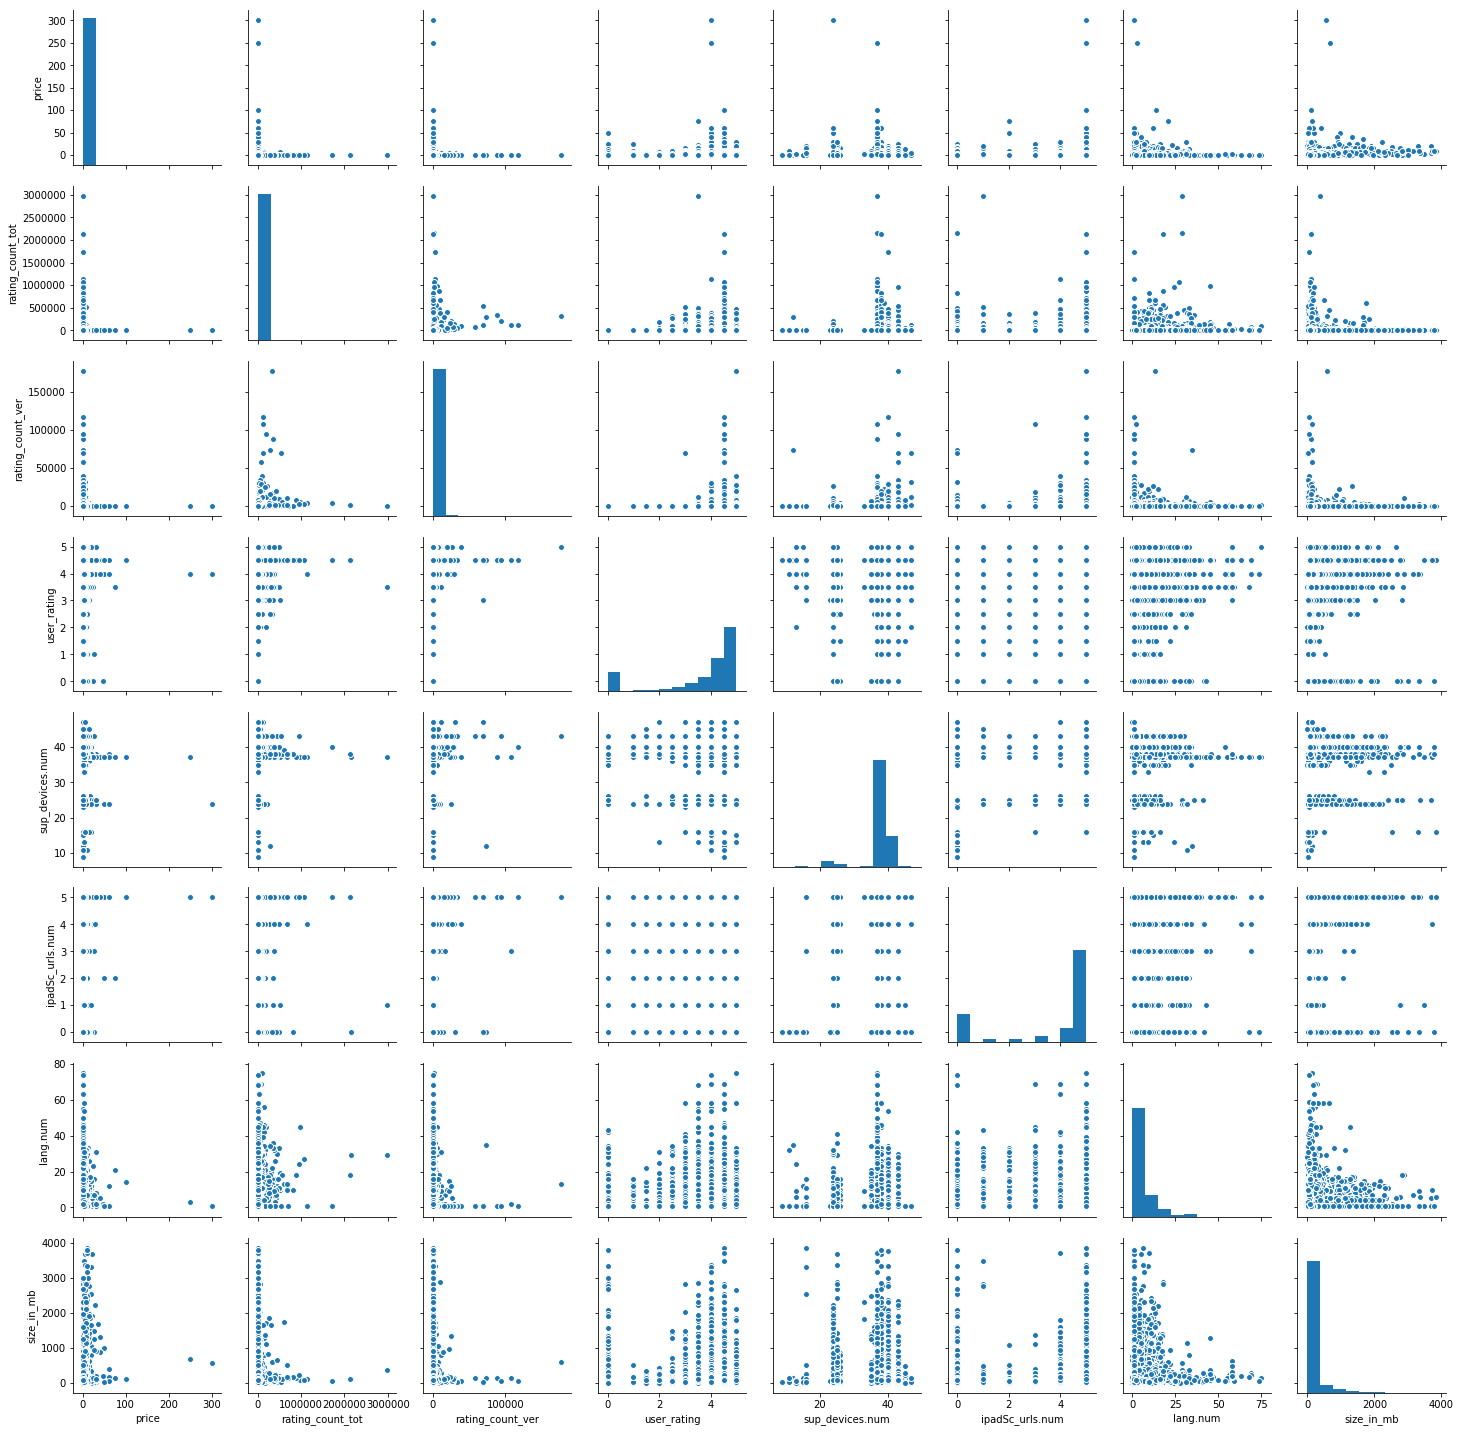

In [20]:
sns.pairplot(data=num,palette='Set1')

(array([6.088e+03, 7.230e+02, 2.080e+02, 8.700e+01, 3.200e+01, 9.000e+00,
        1.600e+01, 5.000e+00, 8.000e+00, 8.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

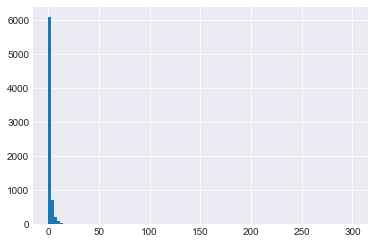

In [21]:
sns.set_style('darkgrid')
plt.hist(df['price'],bins=100)

In [22]:
# We can conclude most of the apps are free 

Defining a criteria to decide on the App's Popularity
* If the number of ratings is LT 30000 then poor or 0
* if the number of ratings GT 30000 but LT 100k then medium or 1 
* If GT 100k then top or 2

In [51]:
def category_create(rating):
    if rating>=100000:
        return 2
    elif rating<30000:
        return 0
    else:
        return 1

In [52]:
df['popularity']=df['rating_count_tot'].apply(category_create)

In [53]:
df.head(3)

,track_name,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,size_in_mb,popularity
id,,,,,,,,,,,,,,,,
281656475,PAC-MAN Premium,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,96.119141,0
281796108,Evernote - stay organized,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,151.232422,2
281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,95.867188,2


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [61]:
names= df[['track_name','currency','cont_rating','prime_genre']]

In [63]:
df.head()

,track_name,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,size_in_mb,popularity
id,,,,,,,,,,,,,,,,
281656475,PAC-MAN Premium,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,96.119141,0
281796108,Evernote - stay organized,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,151.232422,2
281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,95.867188,2
282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,122.558594,2
282935706,Bible,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,88.476562,2


In [64]:
x=df.drop(columns=['popularity','track_name','currency','cont_rating','prime_genre','user_rating_ver','ver','vpp_lic'])

In [65]:
y=df['popularity']

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.35, random_state=42)

In [73]:
scalar= StandardScaler()

In [74]:
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

In [76]:
model=RandomForestClassifier(n_estimators=20,criterion='entropy',random_state=101)
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=101, verbose=0, warm_start=False)

In [77]:
y_pred=model.predict(x_test)

In [78]:
reversefactor = dict(zip(range(3),['poor', 'average', 'popular']))
y_test = np.vectorize(reversefactor.get)(y_test)
y_pred = np.vectorize(reversefactor.get)(y_pred)
cnf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual Species'], colnames=['Predicted Species'])

In [79]:
cnf_matrix

Predicted Species,average,poor,popular
Actual Species,,,
average,105,1,1
poor,0,2336,0
popular,2,0,74


In [80]:
from sklearn.metrics import confusion_matrix,classification_report

In [84]:
print(confusion_matrix(y_test, y_pred))

[[ 105    1    1]
 [   0 2336    0]
 [   2    0   74]]


In [83]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

    average       0.98      0.98      0.98       107
       poor       1.00      1.00      1.00      2336
    popular       0.99      0.97      0.98        76

avg / total       1.00      1.00      1.00      2519



# END! 